# MNIST Handwritten Digit Classifier - Classify the Number

Given a dataset of 6,000 images of handwritten digits, train a neural network to identify the number.

In [1]:
from keras.datasets import mnist
from keras.preprocessing.image import load_img, array_to_img
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


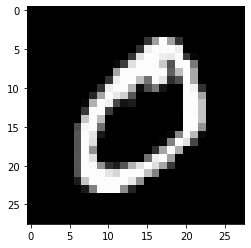

In [4]:
plt.imshow(X_train[1], cmap='gray')

In [5]:
y_train[1]

0

In [6]:
image_height,image_width = 28, 28

X_train = X_train.reshape(60000, image_height*image_width)
X_test = X_test.reshape(10000, image_height*image_width)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255.0
X_test /= 255.0

print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [7]:
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


In [8]:
model = Sequential()

In [9]:
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [10]:
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [12]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
1875/1875 [==============================] - 25s 13ms/step - loss: 0.1842 - accuracy: 0.9445 - val_loss: 0.1089 - val_accuracy: 0.9648
Epoch 2/20
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0798 - accuracy: 0.9749 - val_loss: 0.0980 - val_accuracy: 0.9704
Epoch 3/20
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0558 - accuracy: 0.9829 - val_loss: 0.0876 - val_accuracy: 0.9742
Epoch 4/20
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0437 - accuracy: 0.9860 - val_loss: 0.0796 - val_accuracy: 0.9766
Epoch 5/20
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0326 - accuracy: 0.9893 - val_loss: 0.0802 - val_accuracy: 0.9798
Epoch 6/20
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0284 - accuracy: 0.9914 - val_loss: 0.0874 - val_accuracy: 0.9789
Epoch 7/20
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0258 - accuracy: 0.9919 - val_loss: 0.0903 - va

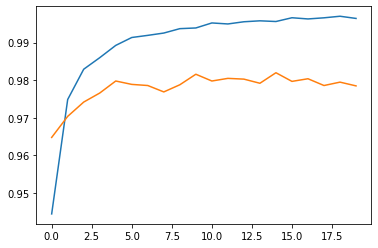

In [13]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

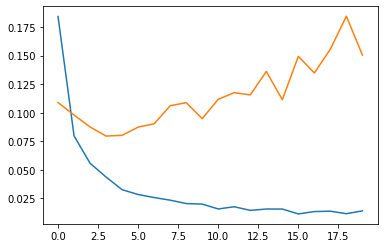

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [15]:
score = model.evaluate(X_test, y_test)
score

313/313 [==============================] - 2s 6ms/step - loss: 0.1505 - accuracy: 0.9785


[0.15050168335437775, 0.9785000085830688]